Node differences for 60-
Visualizing Closeness...
Visualizing Clustering...
Visualizing Degree...
Node differences for 60_70
Visualizing Closeness...
Visualizing Clustering...
Visualizing Degree...
Node differences for 70+
Visualizing Closeness...
Visualizing Clustering...
Visualizing Degree...
Charts saved to pd.pdf


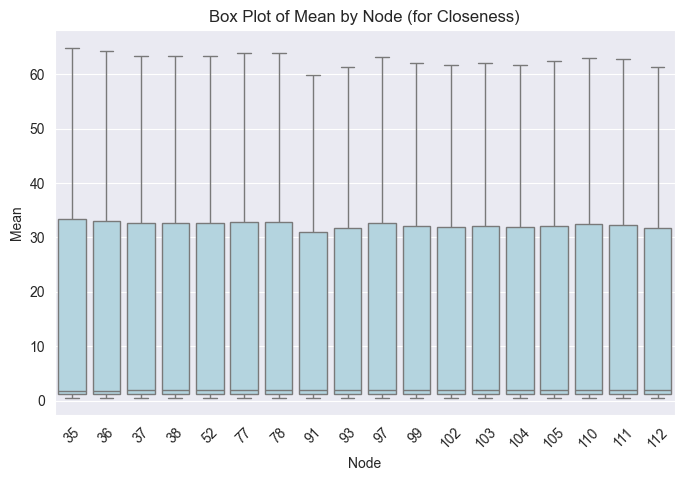

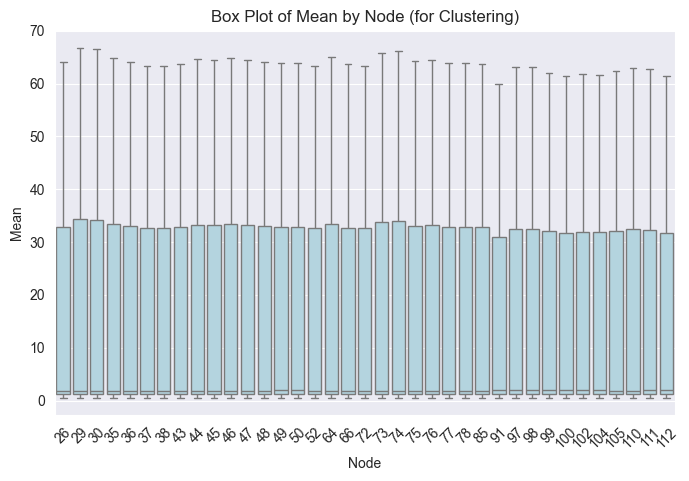

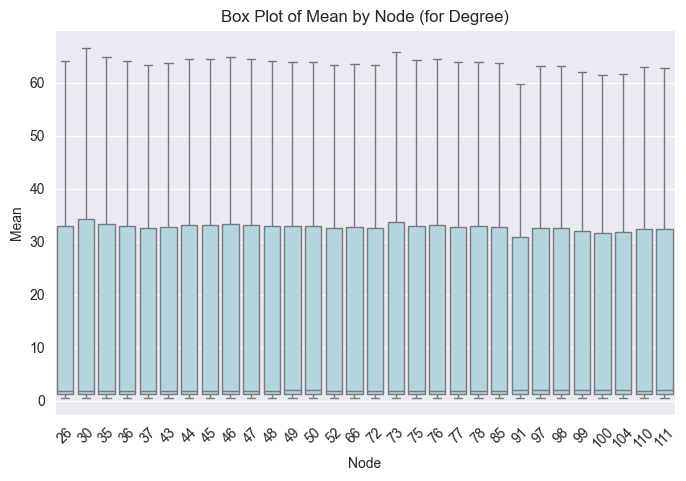

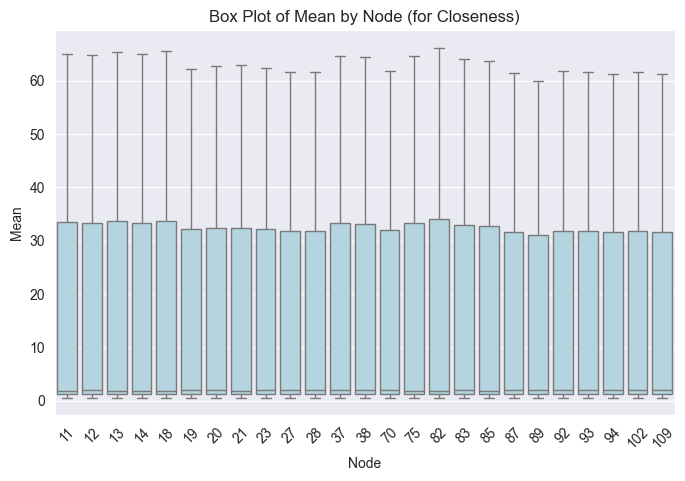

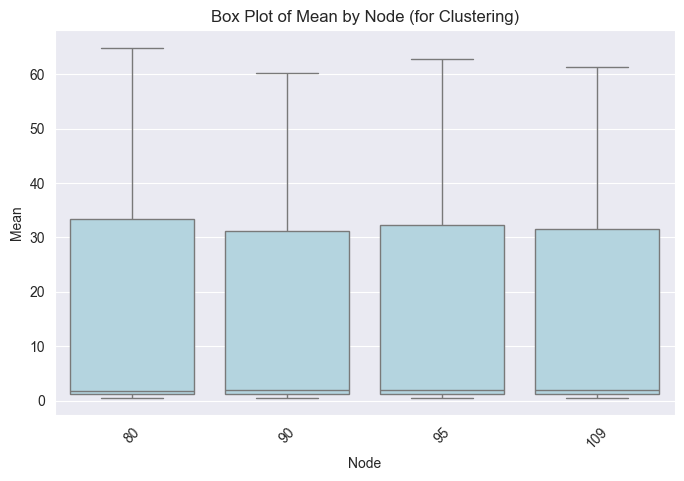

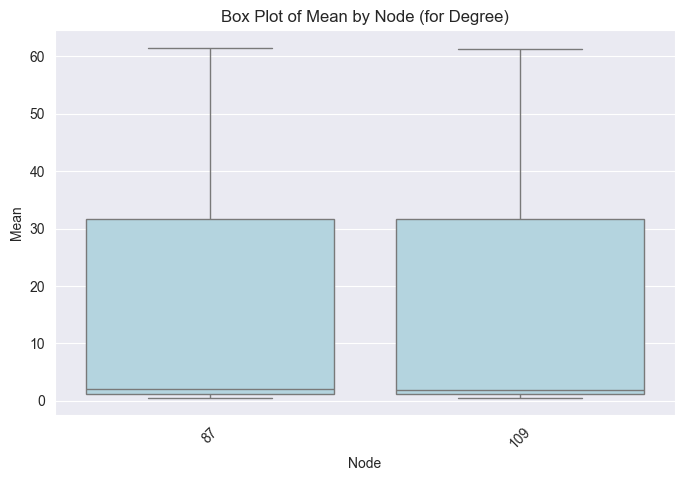

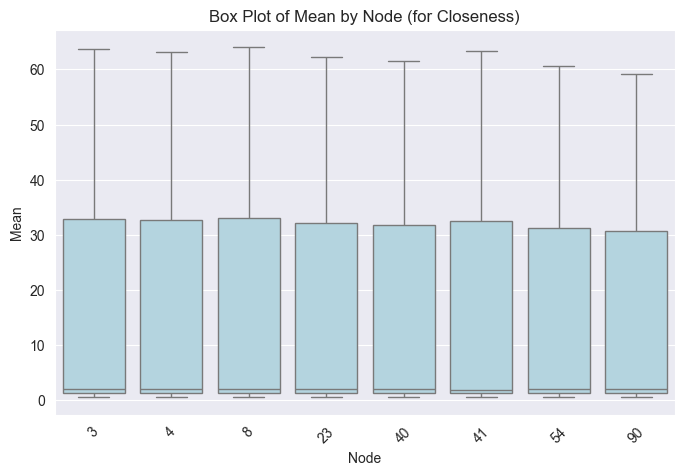

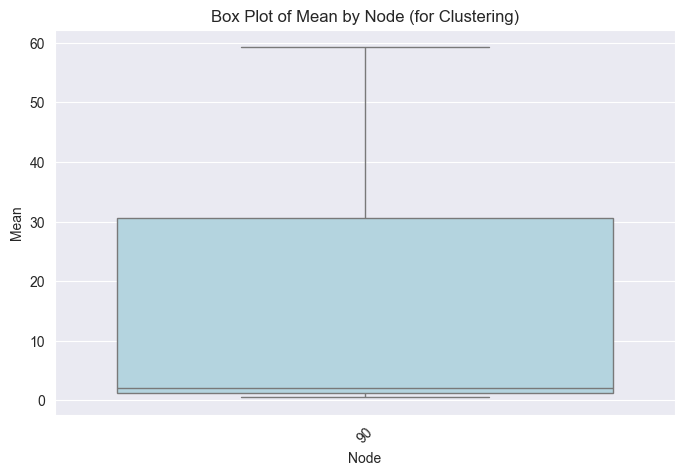

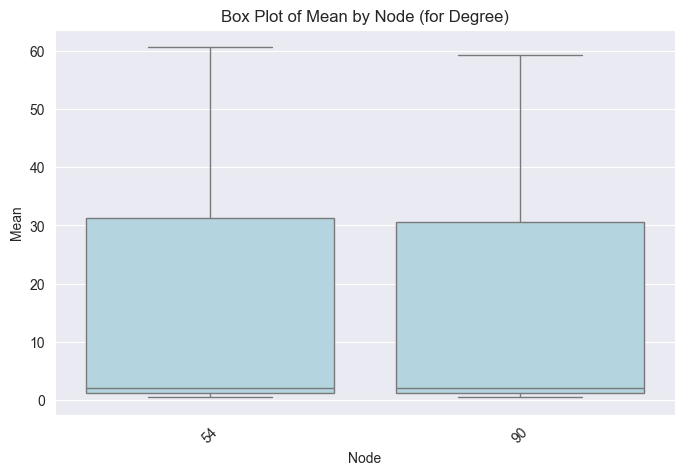

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Load data from a CSV file
def load_data(file_path):
    return pd.read_csv(file_path)

# Plot a box plot
def plot_box_plot(data, x_column, y_column, title, xlabel, ylabel):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data, x=x_column, y=y_column, color='lightblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)

# Filter node data based on the metrics indication CSV file
def filter_nodes_by_metric(metrics_data, metric_column):
    return metrics_data[metrics_data[metric_column] == True]

# Merge the filtered nodes with the main node data
def merge_filtered_nodes(node_data, filtered_nodes):
    return node_data[node_data['Node'].isin(filtered_nodes['Node'])]

# Main function to visualize the data for each metric
def visualize_metrics(node_data, metrics_data):
    # Define metrics to be visualized
    metrics = ['Closeness', 'Clustering', 'Degree']

    for metric in metrics:
        # Filter nodes based on whether the metric is True
        filtered_nodes = filter_nodes_by_metric(metrics_data, metric)

        # Merge the filtered nodes with the node data
        filtered_node_data = merge_filtered_nodes(node_data, filtered_nodes)

        # Create visualizations for each metric
        print(f"Visualizing {metric}...")

        # Plot Box Plot
        plot_box_plot(filtered_node_data, 'Node', 'Mean', f'Box Plot of Mean by Node (for {metric})', 'Node', 'Mean')

# Utility to save all charts into a PDF
def save_charts_to_pdf(pdf_filename="charts_output.pdf"):
    """
    Save all generated matplotlib figures into a PDF.

    Args:
        pdf_filename (str): The name of the output PDF file.
    """
    import matplotlib.pyplot as plt

    # Get all current figure objects
    figures = [plt.figure(i) for i in plt.get_fignums()]

    if not figures:
        print("No figures to save.")
        return

    # Save figures to PDF
    with PdfPages(pdf_filename) as pdf:
        for fig in figures:
            pdf.savefig(fig)  # Save each figure to the PDF

    print(f"Charts saved to {pdf_filename}")

# Example Workflow
print("Node differences for 60-")
# File paths
node_file_path = '../computing/dataset/ppmi/60-/pd/stats/node_statistics.csv'
metrics_file_path = '../computing/analysis/ppmi/60-/comparison/pd/node_analysis.csv'

# Load data
node_data = load_data(node_file_path)
metrics_data = load_data(metrics_file_path)

# Visualize the metrics
visualize_metrics(node_data, metrics_data)

print("Node differences for 60_70")
# File paths
node_file_path = '../computing/dataset/ppmi/60_70/pd/stats/node_statistics.csv'
metrics_file_path = '../computing/analysis/ppmi/60_70/comparison/pd/node_analysis.csv'

# Load data
node_data = load_data(node_file_path)
metrics_data = load_data(metrics_file_path)

# Visualize the metrics
visualize_metrics(node_data, metrics_data)

print("Node differences for 70+")
# File paths
node_file_path = '../computing/dataset/ppmi/70+/pd/stats/node_statistics.csv'
metrics_file_path = '../computing/analysis/ppmi/70+/comparison/pd/node_analysis.csv'

# Load data
node_data = load_data(node_file_path)
metrics_data = load_data(metrics_file_path)

# Visualize the metrics
visualize_metrics(node_data, metrics_data)

# Save all charts to a PDF
save_charts_to_pdf("pd.pdf")
